Intro

In [19]:
%matplotlib inline

import numpy as np
import pyautogui
import os
from PIL import Image, ImageDraw

In [6]:
imageDir = 'ImageData'

Found Locations: 3


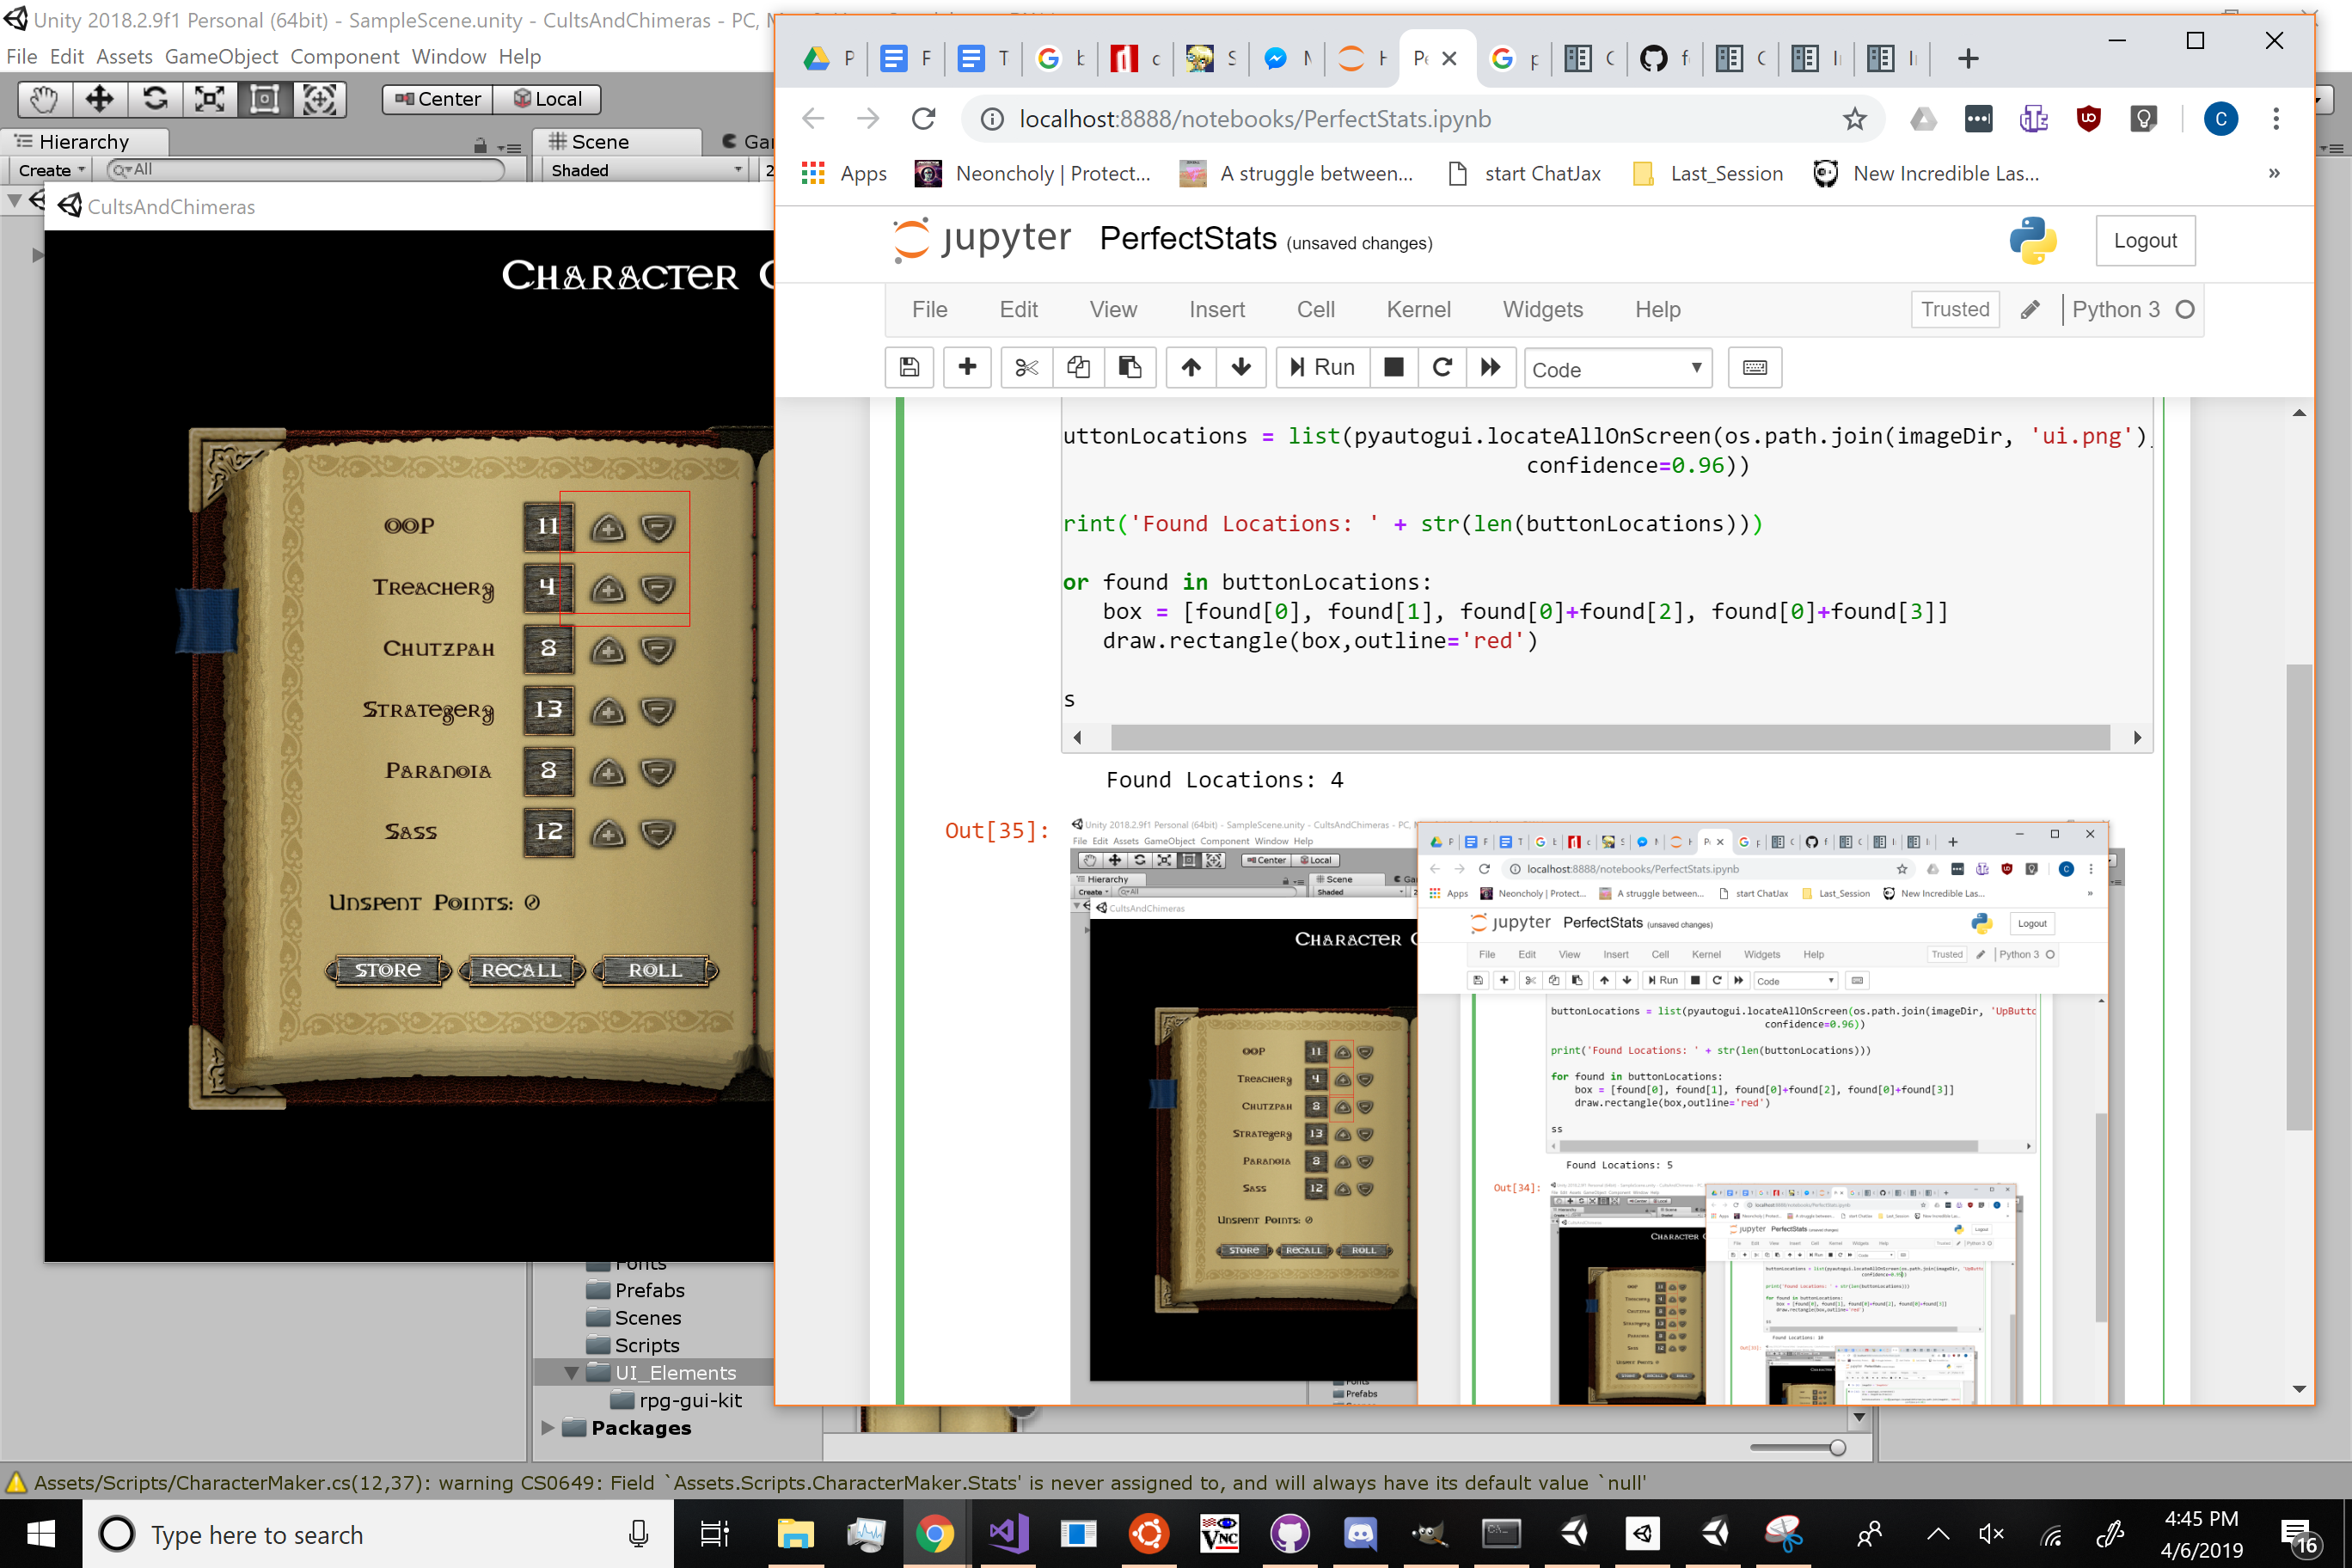

In [36]:
ss = pyautogui.screenshot()
draw = ImageDraw.Draw(ss)

buttonLocations = list(pyautogui.locateAllOnScreen(os.path.join(imageDir, 'ui.png'),
                                    confidence=0.96))

print('Found Locations: ' + str(len(buttonLocations)))
    
for found in buttonLocations:
    box = [found[0], found[1], found[0]+found[2], found[0]+found[3]]
    draw.rectangle(box,outline='red')

ss

In [24]:
i

(672, 866, 63, 59)